In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
# from tf.keras.models import Sequential  # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding, Flatten, Dropout
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
from pandas import read_csv
from datetime import datetime

In [2]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H %M')
df_hcm = read_csv('hcm_new.csv', delimiter = ';', parse_dates = [['Year', 'Month', 'Day', 'Hour', 'Minute']], index_col=0, date_parser=parse)
#header = pd.MultiIndex.from_product([['Danang'], ['Temp', 'Pressure', 'WindSpeed', 'WindDir']])
df_hcm.columns = ['Temp', 'Pressure', 'WindSpeed', 'WindDir']
df_hcm.index.name = 'DateTime'
df_hcm.columns = pd.MultiIndex.from_product([['Ho Chi Minh'], df_hcm.columns])
df_hcm.to_csv('hcm-fixed.csv')

In [3]:
df_danang = read_csv('danang_new.csv', delimiter = ';', parse_dates = [['Year', 'Month', 'Day', 'Hour', 'Minute']], index_col=0, date_parser=parse)
#header = pd.MultiIndex.from_product([['Danang'], ['Temp', 'Pressure', 'WindSpeed', 'WindDir']])
df_danang.columns = ['Temp', 'Pressure', 'WindSpeed', 'WindDir']
df_danang.index.name = 'DateTime'
df_danang.columns = pd.MultiIndex.from_product([['Da Nang'], df_danang.columns])
df_danang.to_csv('danang-fixed.csv')

In [4]:
df_full = df_hcm.join(df_danang)

In [5]:
df_hanoi = read_csv('hanoi_new.csv', delimiter = ';', parse_dates = [['Year', 'Month', 'Day', 'Hour', 'Minute']], index_col=0, date_parser=parse)
#header = pd.MultiIndex.from_product([['Danang'], ['Temp', 'Pressure', 'WindSpeed', 'WindDir']])
df_hanoi.columns = ['Temp', 'Pressure', 'WindSpeed', 'WindDir']
df_hanoi.index.name = 'DateTime'
df_hanoi.columns = pd.MultiIndex.from_product([['Ha Noi'], df_hanoi.columns])
df_hanoi.to_csv('hanoi-fixed.csv')

In [6]:
df_full = df_full.join(df_hanoi)

In [7]:
df_haiphong = read_csv('haiphong_new.csv', delimiter = ';', parse_dates = [['Year', 'Month', 'Day', 'Hour', 'Minute']], index_col=0, date_parser=parse)
#header = pd.MultiIndex.from_product([['Danang'], ['Temp', 'Pressure', 'WindSpeed', 'WindDir']])
df_haiphong.columns = ['Temp', 'Pressure', 'WindSpeed', 'WindDir']
df_haiphong.index.name = 'DateTime'
df_haiphong.columns = pd.MultiIndex.from_product([['Hai Phong'], df_haiphong.columns])
df_haiphong.to_csv('haiphong-fixed.csv')

In [8]:
df_full = df_full.join(df_haiphong)

In [9]:
df_cantho = read_csv('cantho_new.csv', delimiter = ';', parse_dates = [['Year', 'Month', 'Day', 'Hour', 'Minute']], index_col=0, date_parser=parse)
#header = pd.MultiIndex.from_product([['Danang'], ['Temp', 'Pressure', 'WindSpeed', 'WindDir']])
df_cantho.columns = ['Temp', 'Pressure', 'WindSpeed', 'WindDir']
df_cantho.index.name = 'DateTime'
df_cantho.columns = pd.MultiIndex.from_product([['Can Tho'], df_cantho.columns])
df_cantho.to_csv('cantho-fixed.csv')

In [10]:
df_full = df_full.join(df_cantho)

In [11]:
df_full

Ho Chi Minh                            Da Nang           \
                           Temp Pressure WindSpeed WindDir    Temp Pressure   
DateTime                                                                      
2019-07-15 00:00:00       24.75   1007.6     12.10  233.47   25.48   1003.9   
2019-07-15 01:00:00       24.32   1007.2     11.68  236.31   24.58   1003.4   
2019-07-15 02:00:00       23.87   1005.9     10.00  239.74   23.66   1002.7   
2019-07-15 03:00:00       23.61   1005.7      8.53  242.35   22.99   1002.5   
2019-07-15 04:00:00       23.33   1005.9      7.09  246.04   22.50   1003.1   
2019-07-15 05:00:00       23.06   1006.2      5.94  255.96   22.11   1003.5   
2019-07-15 06:00:00       23.57   1007.0      5.15  257.91   22.45   1004.1   
2019-07-15 07:00:00       25.88   1007.1      8.12  257.20   26.23   1003.8   
2019-07-15 08:00:00       28.35   1007.1     14.41  257.01   29.74   1003.5   
2019-07-15 09:00:00       29.81   1006.9     19.06  259.11   31.58   1003.2   
2019-07-15 10:00:00       29.46   1006.6     19.00  260.18   32.98   1003.0   
2019-07-15 11:00:00       29.50   1006.4     17.94  259.59   33.89   1002.8   
2019-07-15 12:00:00       29.47   1005.8     16.87  258.93   34.44   1002.3   
2019-07-15 13:00:00       29.99   1005.3     16.60  257.47   34.37   1002.0   
2019-07-15 14:00:00       29.72   1004.5     15.98  255.65   32.76   1001.6   
2019-07-15 15:00:00       29.32   1004.0     14.15  255.26   32.42   1001.5   
2019-07-15 16:00:00       28.72   1004.4     12.66  255.17   31.29   1001.5   
2019-07-15 17:00:00       29.21   1004.7     12.86  252.07   31.95   1001.8   
2019-07-15 18:00:00       27.95   1005.8      9.79  252.90   30.84   1002.8   
2019-07-15 19:00:00       26.90   1006.5      6.61  240.64   29.26   1003.8   
2019-07-15 20:00:00       26.37   1007.4      6.19  234.46   28.64   1004.6   
2019-07-15 21:00:00       25.94   1007.2      6.88  227.12   28.14   1004.5   
2019-07-15 22:00:00       25.62   1007.4      7.42  230.91   27.58   1004.6   
2019-07-15 23:00:00       25.37   1007.2      7.49  234.78   27.15   1005.0   
2019-07-16 00:00:00       25.11   1006.6      7.41  240.95   26.70   1004.6   
2019-07-16 01:00:00       24.89   1006.0      6.92  242.10   25.96   1004.1   
2019-07-16 02:00:00       24.63   1005.0      6.30  239.04   25.13   1003.3   
2019-07-16 03:00:00       24.34   1004.7      5.80  240.26   24.48   1003.1   
2019-07-16 04:00:00       24.10   1005.4      5.32  241.70   23.92   1003.9   
2019-07-16 05:00:00       24.02   1006.0      4.35  245.56   23.42   1004.6   
...                         ...      ...       ...     ...     ...      ...   
2019-09-09 18:00:00       26.48   1008.9     10.20  227.86   29.59   1004.5   
2019-09-09 19:00:00       25.69   1009.8      8.50  233.62   28.66   1005.7   
2019-09-09 20:00:00       25.38   1010.1      5.80  240.26   27.90   1006.5   
2019-09-09 21:00:00       25.25   1010.3      4.83  243.43   27.31   1006.7   
2019-09-09 22:00:00       25.20   1011.1      3.10  234.46   26.43   1007.0   
2019-09-09 23:00:00       25.32   1011.2      2.81  230.19   25.40   1006.8   
2019-09-10 00:00:00       24.90   1010.3      3.60  233.13   24.75   1005.9   
2019-09-10 01:00:00       24.56   1010.5      3.89  236.31   24.15   1005.1   
2019-09-10 02:00:00       24.17   1009.8      4.10  254.74   23.48   1004.8   
2019-09-10 03:00:00       23.84   1009.1      4.02  243.43   23.02   1005.1   
2019-09-10 04:00:00       23.69   1009.7      3.10  234.46   22.69   1005.8   
2019-09-10 05:00:00       23.57   1010.0      3.08  200.56   22.52   1006.2   
2019-09-10 06:00:00       23.53   1010.3      2.88  180.00   22.97   1007.0   
2019-09-10 07:00:00       25.81   1010.5      3.83  221.19   26.02   1007.4   
2019-09-10 08:00:00       28.14   1010.8      8.65  253.07   29.08   1007.6   
2019-09-10 09:00:00       29.92   1010.7     13.10  249.08   30.66   1007.5   
2019-09-10 10:00:00       29.63   1010.6     16.27  245.14   32.01   1

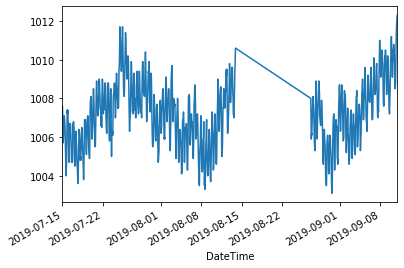

In [12]:
df_full['Ho Chi Minh']['Pressure'].plot()

In [13]:
df_full.values.shape

(1080, 20)

In [14]:
target_city = 'Ho Chi Minh'
target_names = ['Temp', 'WindSpeed', 'Pressure']

In [15]:
shift_days = 1
shift_steps = shift_days * 24 #Num hours want to predict in the future

In [16]:
df_full['Various', 'Day'] = df_full.index.dayofyear
df_full['Various', 'Hour'] = df_full.index.hour



In [17]:
df_targets = df_full[target_city][target_names].shift(-shift_steps)

In [18]:
df_full[target_city][target_names].head(shift_steps + 5)

,Temp,WindSpeed,Pressure
DateTime,,,
2019-07-15 00:00:00,24.75,12.10,1007.6
2019-07-15 01:00:00,24.32,11.68,1007.2
2019-07-15 02:00:00,23.87,10.00,1005.9
2019-07-15 03:00:00,23.61,8.53,1005.7
2019-07-15 04:00:00,23.33,7.09,1005.9
2019-07-15 05:00:00,23.06,5.94,1006.2
2019-07-15 06:00:00,23.57,5.15,1007.0
2019-07-15 07:00:00,25.88,8.12,1007.1
2019-07-15 08:00:00,28.35,14.41,1007.1


In [19]:
df_targets.head(5)

,Temp,WindSpeed,Pressure
DateTime,,,
2019-07-15 00:00:00,25.11,7.41,1006.6
2019-07-15 01:00:00,24.89,6.92,1006.0
2019-07-15 02:00:00,24.63,6.30,1005.0
2019-07-15 03:00:00,24.34,5.80,1004.7
2019-07-15 04:00:00,24.10,5.32,1005.4


In [20]:
df_targets.tail()

,Temp,WindSpeed,Pressure
DateTime,,,
2019-09-10 19:00:00,NaN,NaN,NaN
2019-09-10 20:00:00,NaN,NaN,NaN
2019-09-10 21:00:00,NaN,NaN,NaN
2019-09-10 22:00:00,NaN,NaN,NaN
2019-09-10 23:00:00,NaN,NaN,NaN


In [21]:
x_data = df_full.values[0:-shift_steps]

In [22]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (1056, 22)


In [23]:
y_data = df_targets.values[:-shift_steps]

In [24]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (1056, 3)


In [25]:
num_data = len(x_data)
num_data

1056

In [26]:
train_split = 0.9
num_train = int(train_split * num_data)
num_train

950

In [27]:
num_test = num_data - num_train
num_test

106

In [28]:

x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

1056

In [29]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

1056

In [30]:
num_x_signals = x_data.shape[1]
num_x_signals

22

In [31]:
num_y_signals = y_data.shape[1]
num_y_signals

3

In [32]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 1012.3


In [33]:
x_scaler = MinMaxScaler()

In [34]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [35]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [36]:
x_test_scaled = x_scaler.transform(x_test)

In [37]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [38]:
x_test_scaled.shape

(106, 22)

In [39]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [40]:
model = Sequential()

In [41]:
he_init = tf.variance_scaling_initializer
input_shape = x_train_scaled.shape[1:]

In [42]:
model.add(GRU(units=1024, return_sequences=True, input_shape=(None, num_x_signals)))
model.add(Dropout(0.2))
#model.add(Dense(512))
#model.add(Dropout(0.2))
#model.add(Dense(256))
#model.add(Dropout(0.2))
#model.add(Dense(128))
#model.add(Dropout(0.2))
model.add(Dense(num_y_signals, activation='sigmoid'))
#model.add(Dropout(0.5))

W1227 20:34:23.099349 4350881216 deprecation.py:506] From /Users/BenBella/Desktop/ML_PATH/env/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [43]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [44]:
warmup_steps = 30

In [45]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [46]:
optimizer = Adam(lr=1e-3)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 1024)        3216384   
_________________________________________________________________
dropout (Dropout)            (None, None, 1024)        0         
_________________________________________________________________
dense (Dense)                (None, None, 3)           3075      
Total params: 3,219,459
Trainable params: 3,219,459
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

W1227 20:34:23.337224 4350881216 deprecation.py:323] From /Users/BenBella/Desktop/ML_PATH/env/lib/python3.7/site-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 1024)        3216384   
_________________________________________________________________
dropout (Dropout)            (None, None, 1024)        0         
_________________________________________________________________
dense (Dense)                (None, None, 3)           3075      
Total params: 3,219,459
Trainable params: 3,219,459
Non-trainable params: 0
_________________________________________________________________


In [49]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [50]:
callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1, restore_best_weights=True)

In [51]:

callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

In [52]:
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-3,
                                       patience=0,
                                       verbose=1)

In [53]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [54]:

x_train_scaled_new = x_train_scaled.reshape(1,num_train,22)
y_train_scaled_new = y_train_scaled.reshape(1,num_train,3)
x_test_scaled_new = x_test_scaled.reshape(1,num_test,22)
y_test_scaled_new = y_test_scaled.reshape(1,num_test,3)
%time
model.fit(x_train_scaled_new, y_train_scaled_new,epochs=100, validation_data=(x_test_scaled_new, y_test_scaled_new), callbacks=callbacks)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs
Train on 1 samples, validate on 1 samples
Epoch 1/100

Epoch 00001: val_loss improved from inf to 0.06481, saving model to 23_checkpoint.keras
1/1 [==============================] - 31s 31s/sample - loss: 0.0490 - val_loss: 0.0648
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.06481

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.001.
1/1 [==============================] - 19s 19s/sample - loss: 0.0392 - val_loss: 0.0696
Epoch 3/100

Epoch 00003: val_loss improved from 0.06481 to 0.05888, saving model to 23_checkpoint.keras
1/1 [==============================] - 16s 16s/sample - loss: 0.0391 - val_loss: 0.0589
Epoch 4/100

Epoch 00004: val_loss improved from 0.05888 to 0.05042, saving model to 23_checkpoint.keras
1/1 [==============================] - 16s 16s/sample - loss: 0.0339 - val_loss: 0.0504
Epoch 5/100

Epoch 00005: val_loss improved from 0.05042 to 0.04550, saving model to 23_checkpo

In [55]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 202ms/sample - loss: 0.0226


In [56]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(target_names)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

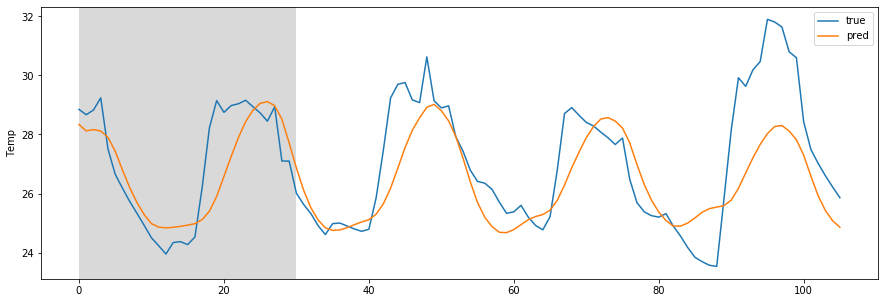

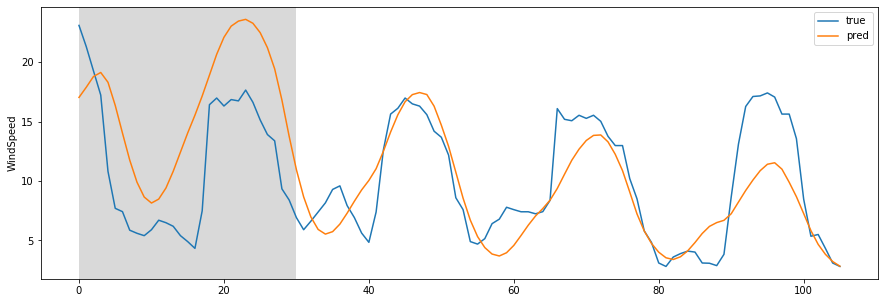

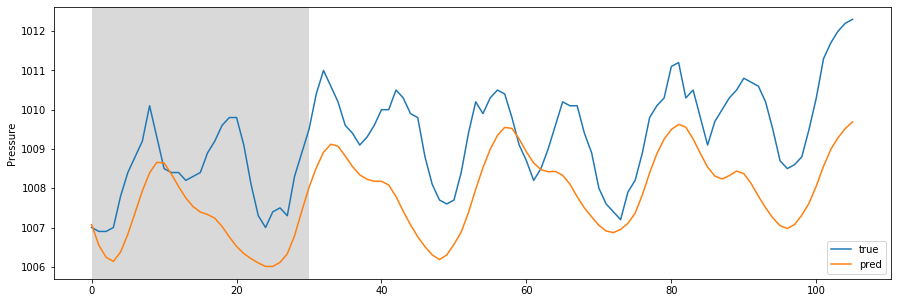

In [57]:
plot_comparison(start_idx=0, length=num_train, train=False)